

*   **Rishabh Patil**
*   **Div : K/K-2**
*   **60009200056**





# **ice_cream_vs_heater Dataset**

# **Vector Autoregression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'ice_cream_vs_heater.csv', parse_dates= True)

In [ ]:
df = df[(df['Month'] > '2004-01') & (df['Month'] <= '2020-06')]

In [ ]:
columns = list(df.columns)[1:]
columns

['heater', 'ice cream']

In [ ]:
df.head(10)

,Month,heater,ice cream
1,2004-02,18,15
2,2004-03,14,16
3,2004-04,13,19
4,2004-05,13,21
5,2004-06,13,24
6,2004-07,13,27
7,2004-08,14,20
8,2004-09,15,18
9,2004-10,20,15
10,2004-11,24,15


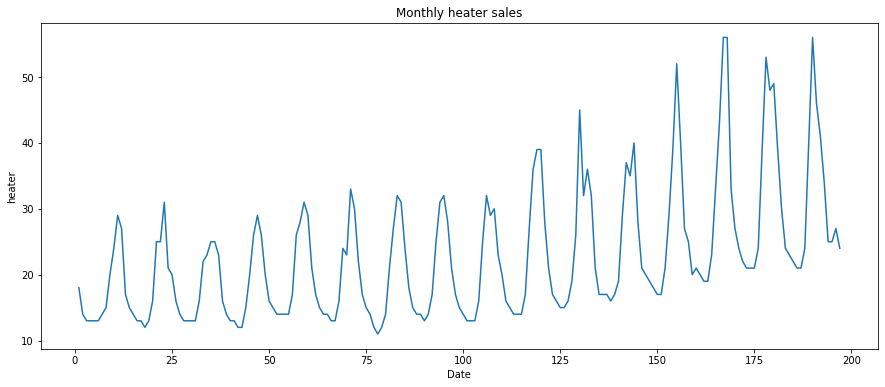

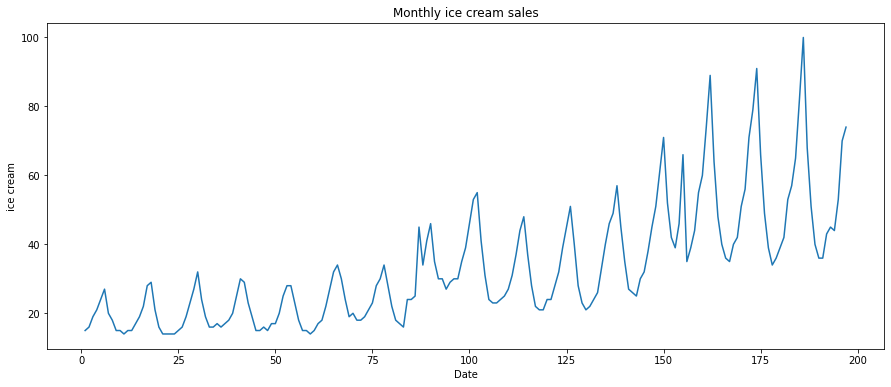

In [ ]:
for c in df[columns]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"Monthly {str(c)} sales")
    plt.show()

The following loop will plot a histogram and KDE for all the columns before making it stationary:

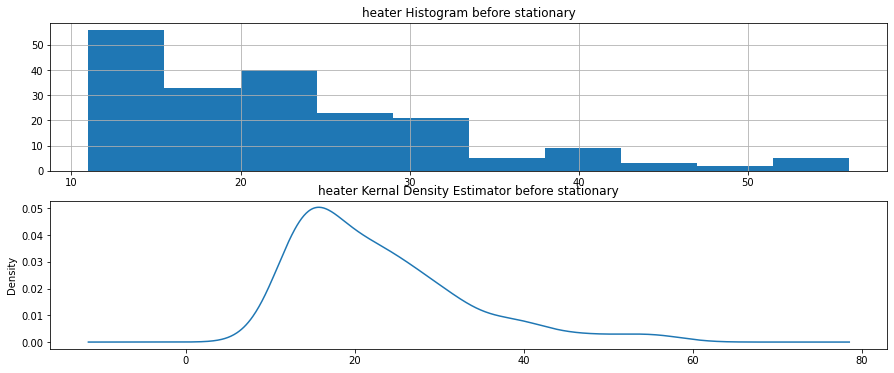

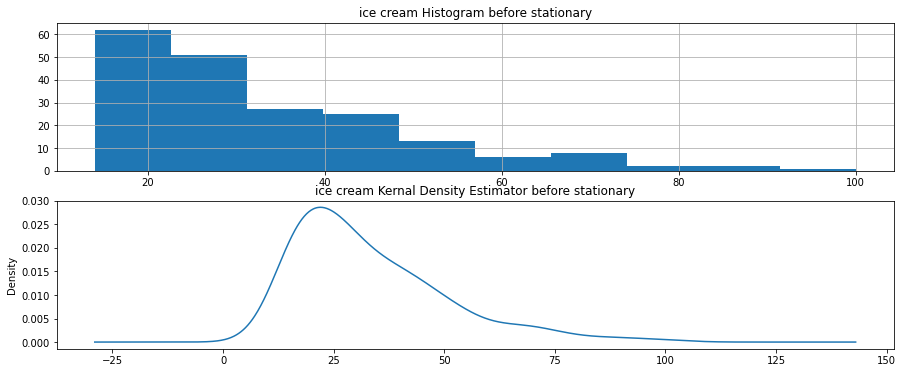

In [ ]:
for c in df[columns]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

Define a time-series evaluation function, as shown below:

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return 

Here is the ADF test function to check for stationary data:

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

Here is how to check whether the variables are stationary:

In [ ]:
for name, column in df[columns].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: heater
Test Statistic                   0.959750
p-value                          0.993823
No Lags Used                    11.000000
Number of Observations Used    185.000000
Critical Value (1%)             -3.466201
Critical Value (5%)             -2.877293
Critical Value (10%)            -2.575168
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: ice cream
Test Statistic                  -0.304822
p-value                          0.924819
No Lags Used                    13.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
Critical Value (10%)            -2.575260
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary




Make a copy of the data, and let’s perform the test train split.
The train will have all the data except the last 30 days, and the test will contain only the last 30 days to evaluate against the predictions.

In [ ]:
X = df[columns]
train, test = X[0:-30], X[-30:]

Make the data stationary by using Pandas differencing, as shown here:

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

Check whether the variables are stationary after first differencing, as 
shown here:

In [ ]:
for name, column in train_diff[columns].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: heater
Test Statistic                -1.510574e+01
p-value                        7.824026e-28
No Lags Used                   1.000000e+01
Number of Observations Used    1.550000e+02
Critical Value (1%)           -3.473259e+00
Critical Value (5%)           -2.880374e+00
Critical Value (10%)          -2.576812e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: ice cream
Test Statistic                  -3.213467
p-value                          0.019218
No Lags Used                    12.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary




Create the plots after making the data stationary, as shown below:

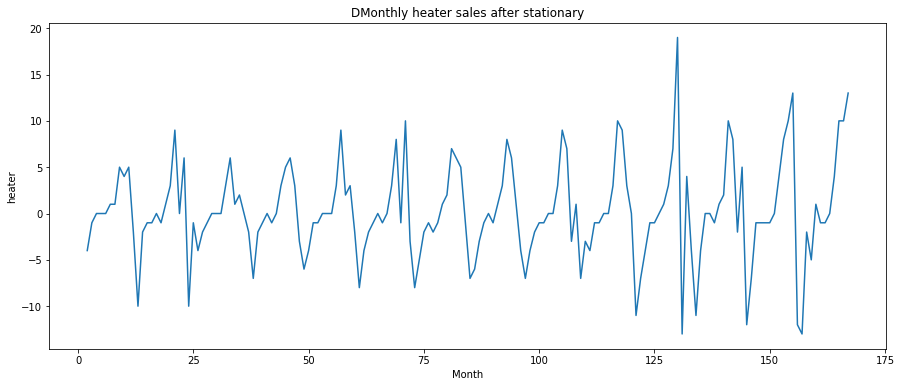

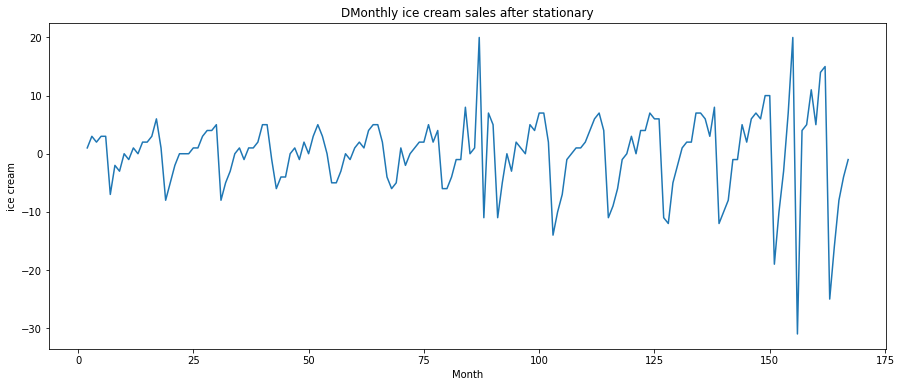

In [ ]:
for c in train_diff[columns]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Month")
    plt.ylabel(c)
    plt.title(f"DMonthly {str(c)} sales after stationary")
    plt.show()

The following loop will plot a histogram and KDE for all the columns 
after making it stationary

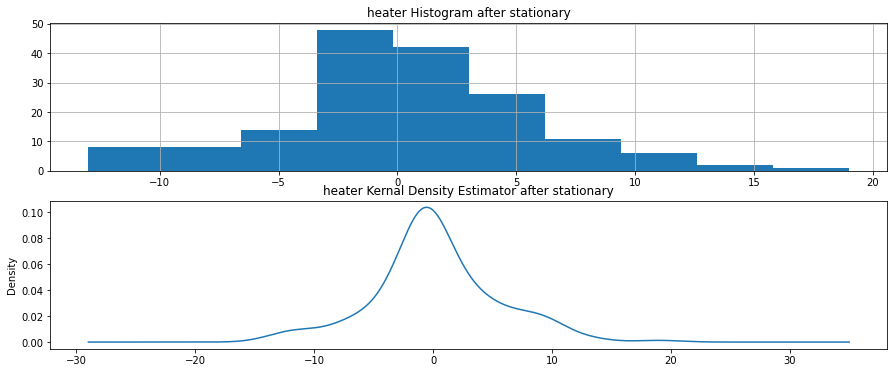

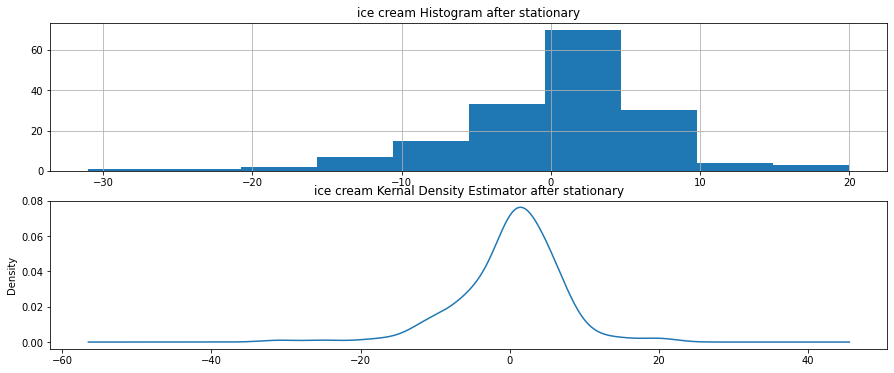

In [ ]:
for c in train_diff[columns]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

,heater,ice cream
2,-4.0,1.0
3,-1.0,3.0
4,0.0,2.0
5,0.0,3.0
6,0.0,3.0
7,1.0,-7.0
8,1.0,-2.0
9,5.0,-3.0
10,4.0,0.0
11,5.0,-1.0


A **cointegration test** is the co-movement among underlying variables over the long run. 

**Cointegration analysis** aims to uncover causal relations among variables by determining if the stochastic trends in a group of variables are shared by the series. If these trends are shared, either one variable causes the other or they are both driven by a third variable.

**Two or more variables are cointegrated if and only if they share common trends.**

Correlation is simply a measure of the degree of mutual association between two or more variables.

We can see that the test says that there is the presence of a long-run relationship between features.

**coint_johansen():**

coint_johansen(endog, det_order, k_ar_diff)

**det_order - int**

-1 - no deterministic terms

0 - constant term

1 - linear trend

**k_ar_diffint - nonnegative**

Number of lagged differences in the model.

The second term in the arguments represents the order of null hypothesis. The third term specifies the number of lagged difference terms used when computing the estimator.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5) 
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1 # Trace statistics
    cvts = res.cvt[:, d[str(1-0.05)]] #Critical values (90%, 95%, 99%) for trace statistic.
    def adjust(val, length= 6): 
        return str(val).ljust(length) #string left justified (ljust)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(train_diff[columns])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
heater >  224.8     > 12.3212   =>   True
ice cream >  72.84     > 4.1296    =>   True


Fit the VAR model for the AR term between 1 to 9 and choose the best AR component, as shown here:

In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

Order : 1, AIC:  6.811858661855111, BIC: 6.924802133633315
Order : 2, AIC:  6.7176415021981555, BIC: 6.906657747797192
Order : 3, AIC:  6.534609958302503, BIC: 6.800330834445415
Order : 4, AIC:  6.105967752760156, BIC: 6.44903401223042
Order : 5, AIC:  5.7843710413786065, BIC: 6.205432507401328
Order : 6, AIC:  5.457566910729587, BIC: 5.957282655705083
Order : 7, AIC:  5.407460803752454, BIC: 5.986499332473253
Order : 8, AIC:  5.2638016328896, BIC: 5.922841070376416
Order : 9, AIC:  5.194715014378907, BIC: 5.93444329847595


To make data stationary, we used Pandas differencing after forecasting 
the results. We need to inverse the result to the original scale. As we don’t 
have a Pandas function for this, let’s define a custom function to inverse 
Pandas differencing.

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

Autoregressive AR(9) appears to be providing the least Akaike 
Information Criterion (AIC) and Bayesian Information Criterion (BIC), so 
let’s fit and forecast.

AIC and BIC are two ways of scoring a model based on its log 
likelihood and complexity.

In [ ]:
results = model.fit(9)
display(results.summary())
z = results.forecast(y=train_diff[columns].values, steps=30)
df_pred = pd.DataFrame(z, columns=columns)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Dec, 2022
Time:                     07:04:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    5.93444
Nobs:                     157.000    HQIC:                   5.49514
Log likelihood:          -815.332    FPE:                    180.747
AIC:                      5.19472    Det(Omega_mle):         143.829
--------------------------------------------------------------------
Results for equation heater
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.392761         0.245479            1.600           0.110
L1.heater           -0.557516         0.082715           -6.740           0.000
L1.ice cream        -0.041275         0.053587           -0.770

Arrange an index for aligning plots, as shown below:

In [ ]:
df_pred["new_index"] = range(167,197)
df_pred = df_pred.set_index("new_index")

In [ ]:
df_pred

,heater,ice cream
new_index,,
167,-4.978200,4.255299
168,-11.706680,5.757115
169,-9.796107,1.535603
170,-9.163604,5.150400
171,-3.837273,8.122422
172,1.245723,14.228271
173,1.649359,4.343157
174,0.626266,-8.739546
175,4.407280,-14.893693


Let’s inverse the differenced prediction, as shown below:

In [ ]:
res = inverse_diff(df[columns],df_pred)

In [ ]:
res

,heater,ice cream,heater_1st_inv_diff,ice cream_1st_inv_diff
new_index,,,,
167,-4.978200,4.255299,19.021800,78.255299
168,-11.706680,5.757115,7.315121,84.012414
169,-9.796107,1.535603,-2.480987,85.548016
170,-9.163604,5.150400,-11.644591,90.698416
171,-3.837273,8.122422,-15.481864,98.820838
172,1.245723,14.228271,-14.236141,113.049109
173,1.649359,4.343157,-12.586782,117.392266
174,0.626266,-8.739546,-11.960516,108.652720
175,4.407280,-14.893693,-7.553236,93.759027


Evaluate the results individually, as shown below:

In [ ]:
for i in columns:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for heater
MSE is : 1089.507202788204
MAE is : 32.44365750291037
RMSE is : 33.00768399612739
MAPE is : 114.74284056920297
R2 is : -7.295740122752823

Evaluation metric for ice cream
MSE is : 1516.9447644049428
MAE is : 38.4479284626559
RMSE is : 38.947975100189005
MAPE is : 77.91434172267682
R2 is : -3.985649395859011



Plot the results, as shown below:

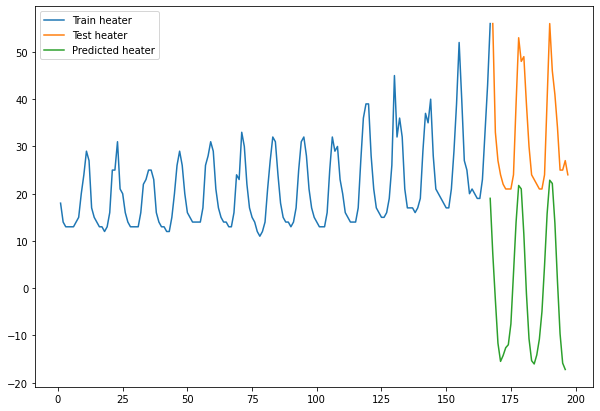

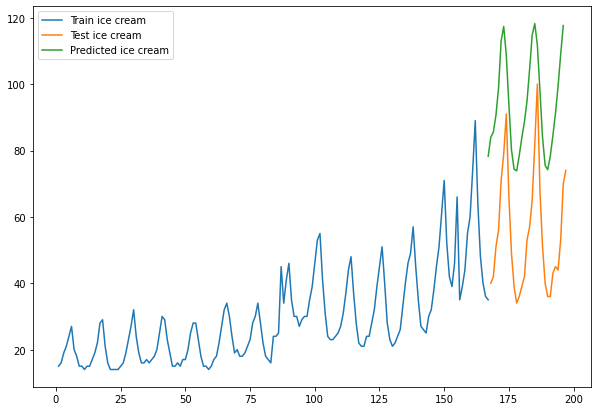

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in columns:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()